# Ensemble Learning
## Wine Dataset

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

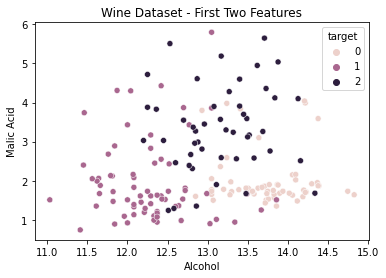

In [14]:
## Data Exploration
# Convert to DataFrame for easy manipulation
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Visualizing first two features
sns.scatterplot(x=df['alcohol'], y=df['malic_acid'], hue=df['target'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine Dataset - First Two Features')
plt.show()


In [15]:
## Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [16]:
## Create the models
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# Hard Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
    voting='hard'
)

# Train individual classifiers
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9305555555555556
RandomForestClassifier 1.0
SVC 0.6527777777777778
VotingClassifier 0.9583333333333334


In [17]:
## Bagging with Decision Trees
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred)}")


Bagging Classifier Accuracy: 0.9305555555555556


In [18]:
## Random Forests
forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred)}")


Random Forest Classifier Accuracy: 1.0


In [19]:
## Feature Importance
for name, score in zip(wine.feature_names, forest_clf.feature_importances_):
    print(name, score)


alcohol 0.10697146479863735
malic_acid 0.029279048225733035
ash 0.015886565490244548
alcalinity_of_ash 0.04535211726372092
magnesium 0.035810143169894455
total_phenols 0.07005257270680461
flavanoids 0.1318417463835832
nonflavanoid_phenols 0.009757642530094953
proanthocyanins 0.030684722242646453
color_intensity 0.19109046908611765
hue 0.06302024554241106
od280/od315_of_diluted_wines 0.13137982988071348
proline 0.13887343267939842


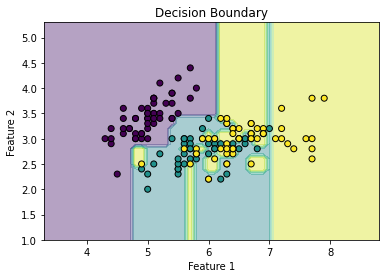

In [21]:
# Load iris dataset and use only two features for simplicity
iris = datasets.load_iris()
X = iris.data[:, :2]  # taking only the first two features
y = iris.target

# Train a classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


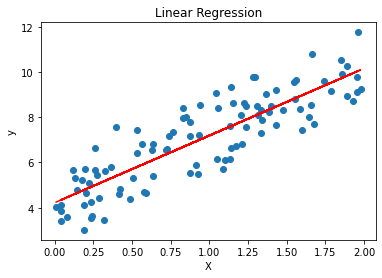

In [23]:
from sklearn.linear_model import LinearRegression

# Generate some random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


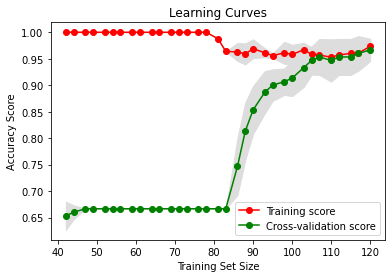

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(SVC(), X, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()
